In [1]:
import casadi as ca
import numpy as np
import matplotlib.pyplot as plt
import control
import collections
import pandas as pd
import scipy as sp

In [2]:
sting_data_5ms = pd.read_csv('Aero_Test_Stings_5ms.txt', sep = "\t", header = None)
sting_data_10ms = pd.read_csv('Aero_Test_Stings_10ms.txt', sep = "\t", header = None)
aero_test_5ms = pd.read_csv('Aero_Test_5ms.txt', sep = "\t", header = None)
aero_test_10ms = pd.read_csv('Aero_Test_10ms.txt', sep = "\t", header = None)
pitch_test_5ms = pd.read_csv('Pitch_5ms.txt', sep ="\t", header = None)
pitch_test_10ms = pd.read_csv('Pitch_10ms.txt', sep ="\t", header = None)
roll_test_5ms = pd.read_csv('roll_testing_5ms_0alpha.txt', sep = "\t", header = None)
roll_test_10ms = pd.read_csv('roll_testing_10ms_0alpha.txt', sep = "\t", header = None)
pitch_test_5ms.columns = ['','Pitot Pressure','Wind Speed (m/s)','Abs AOA','Drag','Lift','Pitch','Roll','F0','F1','F2','F3']
pitch_test_5ms

,,Pitot Pressure,Wind Speed (m/s),Abs AOA,Drag,Lift,Pitch,Roll,F0,F1,F2,F3
0,0.064245,24.811270,4.939727,3.3,0.068395,0.091670,0.343746,-0.006634,0.068395,0.074745,0.081378,-0.064453
1,0.063955,24.816430,4.940355,3.3,0.066128,0.082725,0.324391,-0.007881,0.066128,0.066988,0.074868,-0.059131
2,0.071017,24.819356,4.939941,3.3,0.063939,0.042815,0.338180,-0.007354,0.063939,0.051223,0.058577,-0.066985
3,0.068665,24.817834,4.917760,3.3,0.064257,0.007617,0.354667,-0.001933,0.064257,0.039462,0.041395,-0.073240
4,0.070601,24.815751,4.939843,3.3,0.064729,-0.021673,0.377892,-0.004668,0.064729,0.027843,0.032511,-0.082026
5,0.065761,24.816626,4.917763,3.3,0.066555,-0.031748,0.392905,-0.011340,0.066555,0.021497,0.032837,-0.086081
6,0.068013,24.818874,4.917542,3.3,0.062497,0.101801,0.340296,0.000855,0.062497,0.086013,0.085159,-0.069372
7,0.069760,24.823712,4.939878,3.3,0.065901,0.129897,0.352159,0.000395,0.065901,0.100387,0.099992,-0.070481
8,0.065100,24.826727,4.942288,3.3,0.071187,0.160757,0.369334,0.007712,0.071187,0.120088,0.112375,-0.071706
9,0.064145,24.830003,4.930206,3.3,0.073506,0.185267,0.379102,-0.002465,0.073506,0.127969,0.130435,-0.073137


In [3]:
sting_data_10ms.columns = ['','Pitot Pressure','Wind Speed (m/s)','Abs AOA','Drag','Lift','Pitch','Roll','F0','F1','F2','F3']
sting_data_5ms.columns = ['','Pitot Pressure','Wind Speed (m/s)','Abs AOA','Drag','Lift','Pitch','Roll','F0','F1','F2','F3']
pitch_test_10ms.columns = ['','Pitot Pressure','Wind Speed (m/s)','Abs AOA','Drag','Lift','Pitch','Roll','F0','F1','F2','F3']

roll_test_5ms.columns = ['','Pitot Pressure','Wind Speed (m/s)','Abs AOA','Drag','Lift','Pitch','Roll','F0','F1','F2','F3']
roll_test_10ms.columns = ['','Pitot Pressure','Wind Speed (m/s)','Abs AOA','Drag','Lift','Pitch','Roll','F0','F1','F2','F3']


pitch_test_10ms

,,Pitot Pressure,Wind Speed (m/s),Abs AOA,Drag,Lift,Pitch,Roll,F0,F1,F2,F3
0,0.239918,25.014256,9.999373,3.3,0.215238,0.293549,1.133902,-0.011196,0.215238,0.253020,0.264216,-0.223687
1,0.240243,25.046315,10.010075,3.3,0.208971,0.193348,1.112611,-0.017616,0.208971,0.198798,0.216414,-0.221863
2,0.238762,25.065858,9.979539,3.3,0.211713,0.048449,1.176609,-0.019927,0.211713,0.136528,0.156455,-0.244534
3,0.239763,25.076410,9.975533,3.3,0.225551,-0.093110,1.279083,-0.015575,0.225551,0.081030,0.096605,-0.270745
4,0.239110,25.086879,9.983105,3.3,0.230517,-0.164385,1.312286,-0.022537,0.230517,0.045900,0.068438,-0.278723
5,0.238582,25.094658,9.983847,3.3,0.245807,-0.246152,1.413370,-0.018891,0.245807,0.018892,0.037782,-0.302826
6,0.239407,25.105790,9.999079,3.3,0.226856,0.418883,1.135125,-0.018538,0.226856,0.306056,0.324594,-0.211768
7,0.240538,25.111030,10.023797,3.3,0.240701,0.547526,1.192650,-0.018908,0.240701,0.374305,0.393213,-0.219992
8,0.240041,25.121306,10.016380,3.3,0.255723,0.681757,1.222832,-0.015306,0.255723,0.441236,0.456542,-0.216021
9,0.240906,25.136981,10.022590,3.3,0.269317,0.794930,1.268429,-0.008744,0.269317,0.502963,0.511707,-0.219740


In [4]:
rho = 1.225
lb2N = 4.448221615
S = 0.14709648

vaero5 = pitch_test_5ms['Wind Speed (m/s)']
vaero10 = pitch_test_10ms['Wind Speed (m/s)']

q5 = 0.5*rho*vaero5*vaero5
q10 = 0.5*rho*vaero10*vaero10;
alpha_slope = 2.260509488;
alpha_0 = 3.964867942;
alpha = np.array([0,2,4,6,8,10,-2,-4,-6,-8,-10])
alpha = alpha*alpha_slope + alpha_0 

In [5]:
PitchStingData5 = sting_data_5ms['Pitch']
PitchSting5 = (PitchStingData5[0] + PitchStingData5[1])/2
RollStingData5 = sting_data_5ms['Roll']
RollSting5 = (RollStingData5[0] + RollStingData5[1])/2

PitchStingData10 = sting_data_10ms['Pitch']
PitchSting10 = (PitchStingData10[0] + PitchStingData10[1])/2
RollStingData10 = sting_data_10ms['Roll']
RollSting10 = (RollStingData10[0] + RollStingData10[1])/2

Pitch5 = pitch_test_5ms['Pitch']
Roll5 = roll_test_5ms['Roll']
Pitch10 = pitch_test_10ms['Pitch']
Roll10 = roll_test_10ms['Roll']

pitch_pwm5 = np.array([1507,1401,1293,1197,1093,991,1605,1709,1808,1914,2015])
pitch_pwm10 = np.array([1505,1396,1298,1195,1096,992,1607,1710,1808,1911,2016]) 
roll_pwm5 = np.array([1501,1401,1297,1192,1094,991,1606,1707,1804,1910,2015])
roll_pwm10 = np.array([1501,1401,1293,1194,1096,991,1599,1711,1810,1908,2015])


In [6]:
b = 0.651
S = 0.14709648
tr = 1/5
cy = lambda y: ((2*S)/((1+tr)*b)*(1-(1-tr)/b*2*abs(y)))**2

In [7]:
mac = sp.integrate.quad(cy,0,b/2)

In [8]:
mac = 2/S*mac[0]

In [9]:
mac

0.25942941798941793

In [10]:
Cm_pitch5 = (Pitch5-PitchSting5)/(q5*S*mac)
Cm_pitch10 = (Pitch10-PitchSting10)/(q10*S*mac)

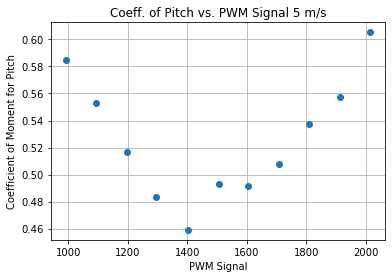

In [11]:
plt.plot(pitch_pwm5,Cm_pitch5,'o')
plt.xlabel('PWM Signal')
plt.ylabel('Coefficient of Moment for Pitch')
plt.title('Coeff. of Pitch vs. PWM Signal 5 m/s')
plt.grid()

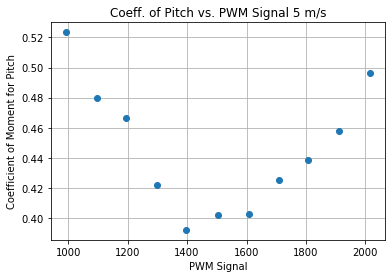

In [12]:
plt.plot(pitch_pwm10,Cm_pitch10,'o')
plt.xlabel('PWM Signal')
plt.ylabel('Coefficient of Moment for Pitch')
plt.title('Coeff. of Pitch vs. PWM Signal 5 m/s')
plt.grid()